  **Deposit Subscription Prediction**

In [ ]:
!wget https://raw.githubusercontent.com/trimm-trabb/PythonML/main/data_preprocessing.py

In [2]:
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from data_preprocessing import preprocess_data, preprocess_new_data

In [3]:
pd.options.display.max_columns = None

# Exploratory Data Analysis and Data Preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data/bank-additional-full.csv", delimiter=";")
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


| Variable Name   | Role    | Type        | Description                                                                                                                                                   |
|-----------------|---------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age             | Feature | Integer     |                                                                                                                                                               |
| job             | Feature | Categorical | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| marital         | Feature | Categorical | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                             |
| education       | Feature | Categorical | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                 |
| default         | Feature | Binary      | has credit in default?                                                                                                                                        |
| balance         | Feature | Integer     | average yearly balance                                                                                                                                        |
| housing         | Feature | Binary      | has housing loan?                                                                                                                                             |
| loan            | Feature | Binary      | has personal loan?                                                                                                                                            |
| contact         | Feature | Categorical | contact communication type (categorical: 'cellular','telephone')                                                                                              |
| day_of_week     | Feature | Date        | last contact day of the week                                                                                                                                  |
| month           | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                              |
| duration        | Feature | Integer     | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| campaign        | Feature | Integer     | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                        |
| pdays           | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)             |
| previous        | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                                         |
| poutcome        | Feature | Categorical | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                   |
| emp.var.rate    | Feature | Float       | employment variation rate                                                                                                                |
| cons.price.idx  | Feature | Float       | consumer price index                                                                                                                       |
| cons.conf.idx   | Feature | Float       | consumer confidence index                                                                                                                  |
| euribor3m       | Feature | Float       | euribor 3 month rate                                                                                                                                          |
| nr.employed     | Feature | Integer     | number of employees in thousands (specific values reflecting employment levels at different periods)                                                                                                                      |
| y               | Target  | Binary      | has the client subscribed a term deposit?                                                                                                                     |


Let's check the dataframe size:

In [6]:
df.shape

(41188, 21)

Let's check data types and whether we have any missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Let's generate descriptive statistics for the numerical data:

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The 'pdays' variable (number of days that passed by after the client was last contacted from a previous campaign) shows a weird distribution with a min of 0, a mean of 962.48 and a max of 999. The high value of 999 might represent clients who were not contacted for a long time or a default value for non-contacted clients, potentially making this variable less informative. Let's see what was the number of contacts performed before this campaign for customers with 'pdays' equal to 999:

In [7]:
df[df.pdays == 999].previous.value_counts() # number of contacts performed before this campaign for customers with pdays == 999

,count
previous,
0,35563
1,3696
2,349
3,50
4,12
5,2
6,1


In [ ]:
df[df.pdays != 999].previous.value_counts() # number of contacts performed before this campaign for customers with pdays != 999

,count
previous,
1,865
2,405
3,166
4,58
5,16
6,4
7,1


In [ ]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

So most of the customers with pdays equal to 999 (~90%) were not contacted before this campaign, but 10% were. We can separate these groups by changing pdays to, say, -1 for those who were not previously contacted and to, say, 100 for those who were to still make them distinct from the other customers who have pdays in 'normal' range under 30.

In [8]:
def update_pdays(row):
  if (row['previous'] == 0) & (row['pdays'] == 999):
    return -1
  elif (row['previous'] > 0) & (row['pdays'] == 999):
    return 100
  else:
    return row['pdays']

df['pdays'] = df.apply(update_pdays, axis=1)

Let's check what values we have in the categorical columns and see whether they can be grouped / modified:

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for c in categorical_cols:
  print(df[c].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: in

Some of the job types can be grouped into broader categories:

In [10]:
def categorize_job(job):
    if job in ['housemaid', 'blue-collar', 'services', 'technician']:
        return 'service and manual labor'
    elif job in ['admin.', 'management']:
        return 'administration and management'
    elif job in ['self-employed', 'entrepreneur']:
        return 'self-employment and entrepreneurship'
    else:
        return job

df['job'] = df['job'].apply(categorize_job)

Months and days of week can be assigned their numerical values:

In [11]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_of_week = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

df['month'] = df['month'].map(month_mapping)
df['day_of_week'] = df['day_of_week'].map(day_of_week)

Let's also update the target column to contain 0 and 1 rather than 'yes' and 'no':

In [12]:
df.y = df.y.replace(to_replace=['no', 'yes'], value=[0, 1])

Attribute 'duration' highly affects the output target (if duration==0 then y='no', as we don't know the answer yet). It is reasonable to exclude all the records where the call hasn't been done yet (duration==0).

In [12]:
df[df.duration == 0].y.value_counts()

,count
y,
no,4


It's only 4 records, so it's safe to just drop them:

In [13]:
df = df[df.duration > 0]

 Feature engineering could help capture additional insights or relationships between the external economic factors. Let's create some additional features:

In [14]:
df['emp_conf_ratio'] = df['nr.employed'] / df['cons.conf.idx']
df['emp_var_price_idx'] = df['emp.var.rate'] * df['cons.price.idx']
df['emp_var_euribor_diff'] = df['emp.var.rate'] - df['euribor3m']
df['conf_price_diff'] = df['cons.conf.idx'] - df['cons.price.idx']
df['economic_sentiment'] = 0.4 * df['cons.conf.idx'] + 0.3 * df['emp.var.rate'] + 0.3 * df['euribor3m']

Let's prepare the data by encoding categorical features, scaling numerical features (optional, depending on the model type), removing some data (model shouldn't use the duration attribute as it would not be available during actual prediction) and splitting the dataset into training and validation sets:

In [27]:
# Splitting the data into train and validation sets, encoding categorical data
datasets, input_cols, scaler, encoder = preprocess_data(df, 'y', ['duration'], [])
train_X = datasets['train_X']
train_y = datasets['train_y']
val_X = datasets['val_X']
val_y = datasets['val_y']

In [49]:
# Same split into train and validation sets and same encoding + scaling the data
datasets_scaled, input_cols, scaler, encoder = preprocess_data(df, 'y', ['duration'], [], scale_numeric=True)
train_X_scaled = datasets_scaled['train_X']
val_X_scaled = datasets_scaled['val_X']

The Mutual Information (MI) values represent the amount of information each feature contributes to predicting the target variable, where higher values indicate a stronger relationship with the target. Let's compute MI for our dataset:

In [67]:
# Compute mutual information between each feature and the target
mi = mutual_info_classif(train_X, train_y)

# Convert to a DataFrame
mi_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

mi_df.head(20)

,Feature,Mutual Information
15,economic_sentiment,0.074503
13,emp_var_euribor_diff,0.072723
9,euribor3m,0.072393
11,emp_conf_ratio,0.069843
7,cons.price.idx,0.068799
12,emp_var_price_idx,0.068417
14,conf_price_diff,0.067119
8,cons.conf.idx,0.067082
10,nr.employed,0.064163
6,emp.var.rate,0.053246


Economic variables have high MI values, indicating that external economic conditions are critical in determining the likelihood of a client subscribing to a term deposit.

Interesting that client characteristics seem to be much less important compared to economic factors.

This might indicate potential data insufficiency of the dataset.

# Training ML Models
## Selecting the metric for model evaluation

For an unbalanced binary classification problem, traditional metrics like accuracy can be misleading, as they might overemphasize the majority class. The following metrics are more appropriate for evaluating models in such cases:

Precision: Measures the accuracy of positive predictions. It’s useful when we want to minimize false positives.

Recall (Sensitivity/True Positive Rate): Measures how well the model captures actual positives, focusing on minimizing false negatives (missing positive predictions).

F1 Score: The harmonic mean of precision and recall. It balances the two metrics and is especially useful when both false positives and false negatives are important.

Area Under the ROC Curve (AUC-ROC): Reflects the trade-off between true positive rate (recall) and false positive rate across different threshold settings.

Since the goal is to predict whether a client will subscribe to a term deposit, and  marketing strategies usually aim to maximize client acquisition while balancing resource efficiency, I think it makes sense to focus on F1 Score.

In [30]:
# Compute precision, recall, F1, build confusion matrix
def compute_metrics(model, inputs, targets, name='', threshold=0.5):
  # Compute predictions based on custom threshold
  preds_probas = model.predict_proba(inputs)[:,1]
  preds = (preds_probas >= threshold).astype(int)

  # Compute precision, recall, F1
  precision = precision_score(targets, preds)
  recall = recall_score(targets, preds)
  f1 = f1_score(targets, preds)

  print("Precision score: {:.2f}".format(precision))
  print("Recall score: {:.2f}".format(recall))
  print("F1 score: {:.2f}".format(f1))

  # Build confusion matrix
  cm_abs = confusion_matrix(targets, preds)
  cm_percentage = confusion_matrix(targets, preds, normalize='true')

  plt.figure()
  ax = sns.heatmap(cm_percentage, annot=True)

  threshold = cm_abs.max() / 2
  for i in range(cm_abs.shape[0]):
    for j in range(cm_abs.shape[1]):
      ax.text(j + 0.5, i + 0.6, f'\n({cm_abs[i, j]})',
              ha='center', va='center', fontsize=10,
              color="white" if cm_abs[i, j] < threshold else "black")

  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))
  plt.show()

In [31]:
# Find the best threshold to predict the positive class to achieve the best F1
def get_best_threshold(model, val_X, val_y):
  y_probs = model.predict_proba(val_X)[:, 1]  # Get probabilities for the positive class
  f1s = []
  thresholds = np.arange(0.0, 1.0, 0.025)  # Create a range of thresholds
  for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f1s.append(f1_score(val_y, y_pred_thresh))

  best_threshold = thresholds[np.argmax(f1s)]
  return best_threshold

## Logistic Regression

In [50]:
lr = LogisticRegression(solver='sag')
lr.fit(train_X_scaled, train_y)

LogisticRegression(solver='sag')

Best threshold: 0.18
Precision score: 0.41
Recall score: 0.54
F1 score: 0.47


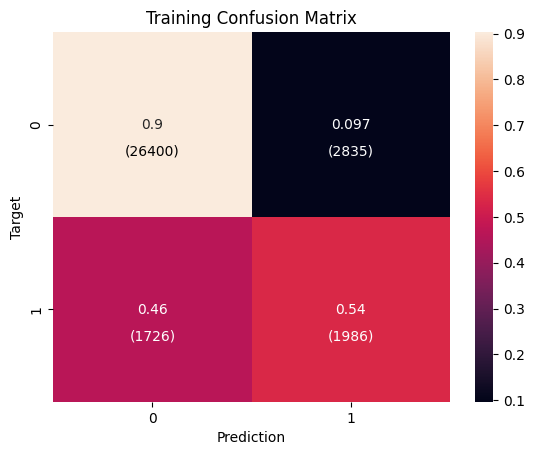

Precision score: 0.43
Recall score: 0.57
F1 score: 0.49


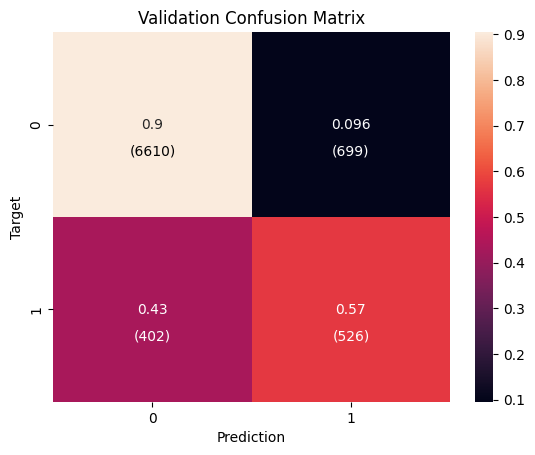

In [51]:
threshold = get_best_threshold(lr, val_X_scaled, val_y)
print("Best threshold: {:.2f}".format(threshold))
compute_metrics(lr, train_X_scaled, train_y, 'Training', threshold)
compute_metrics(lr, val_X_scaled, val_y, 'Validation', threshold)

## KNN

In [39]:
k_values = np.arange(20, 100)
param_grid = {'n_neighbors': k_values}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="f1")
grid_search_knn.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1')

In [40]:
knn = grid_search_knn.best_estimator_
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=23)

Best threshold: 0.23
Precision score: 0.46
Recall score: 0.56
F1 score: 0.50


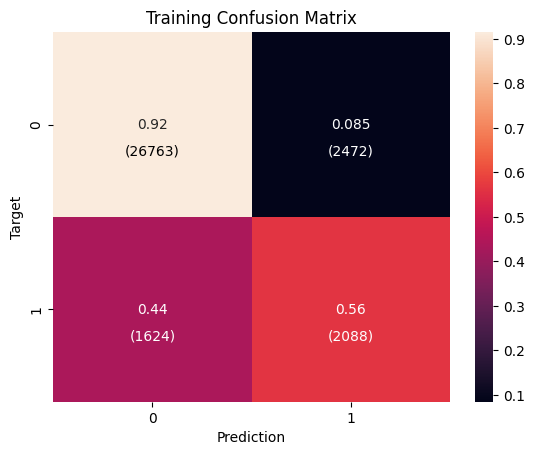

Precision score: 0.46
Recall score: 0.55
F1 score: 0.50


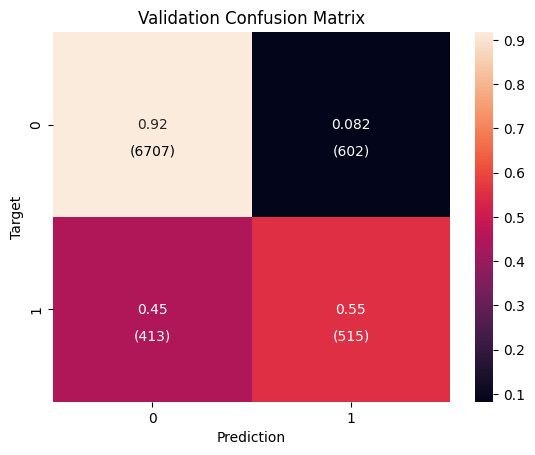

In [41]:
threshold = get_best_threshold(knn, val_X, val_y)
print("Best threshold: {:.2f}".format(threshold))
compute_metrics(knn, train_X, train_y, 'Training', threshold)
compute_metrics(knn, val_X, val_y, 'Validation', threshold)

## Decision Tree

In [68]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': np.arange(5, 30),
    'max_leaf_nodes': np.arange(10, 50),
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.001]
}

cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [69]:
random_search_tree = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params_dt,
    n_iter=40,
    cv=cv_strategy,
    scoring="f1",
    random_state=42,
    refit=True
)

In [70]:
random_search_tree.fit(train_X, train_y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.001],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 5],
                                        'splitter': ['best']},
                   random_state=42, scoring='f1')

In [71]:
random_search_tree.best_params_, random_search_tree.best_score_

({'splitter': 'best',
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'min_impurity_decrease': 0.0,
  'max_leaf_nodes': 23,
  'max_features': None,
  'max_depth': 19,
  'criterion': 'entropy'},
 0.37674109983816395)

In [72]:
dt = random_search_tree.best_estimator_
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=19, max_leaf_nodes=23,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

Best threshold: 0.28
Precision score: 0.46
Recall score: 0.55
F1 score: 0.50


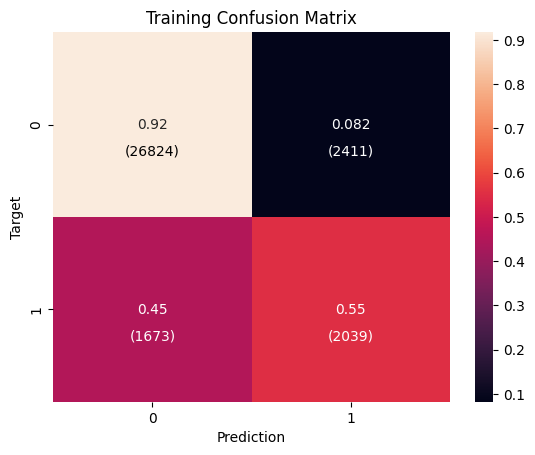

Precision score: 0.47
Recall score: 0.57
F1 score: 0.52


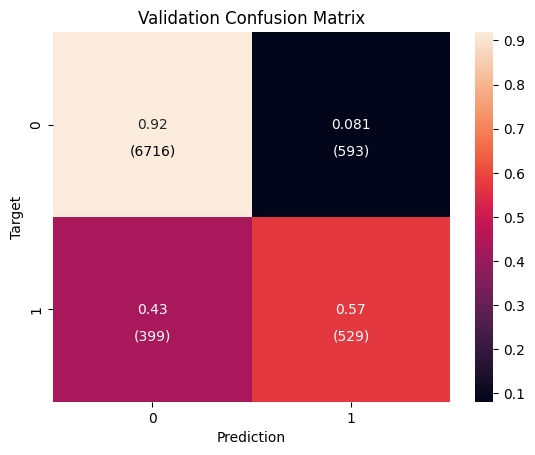

In [73]:
threshold = get_best_threshold(dt, val_X, val_y)
print("Best threshold: {:.2f}".format(threshold))
compute_metrics(dt, train_X, train_y, 'Training', threshold)
compute_metrics(dt, val_X, val_y, 'Validation', threshold)

## XGB

### Parameter tuning with Hyperopt

In [52]:
# Function that specifies objective
def objective(model_class, param_space, params, **model_specific_params):
    # Convert hyperopt params to the correct types if necessary
    model_params = {key: int(value) if key in param_space['int_params'] else value for key, value in params.items()}

    # Initialize the model
    model = model_class(**model_params, **model_specific_params, random_state=42)

    # Fit the model
    model.fit(train_X, train_y, eval_set=[(val_X, val_y)], verbose=False)

    # Compute F1
    preds = model.predict(val_X)
    f1 = f1_score(val_y, preds)

    return {'loss': -f1, 'status': STATUS_OK}

# Wrapper function for hyperopt for XGB
def hyperopt_objective_XGB(params):
    return objective(XGBClassifier, param_space, params, enable_categorical=True)

# Function to find best hyperparameters
def optimize_hyperopt_params(objective, space, int_params, max_evals):
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=max_evals, trials=Trials())
    # Convert hyperparameter values to final types
    for key in int_params:
      best[key] = int(best[key])

    print("Best hyperparameters: ", best)

    return best

In [74]:
param_space = {
    'params': {
      'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
      'learning_rate': hp.uniform('learning_rate', 0.001, 0.05),
      'max_depth': hp.quniform('max_depth', 3, 5, 1),
      'min_child_weight': hp.quniform('min_child_weight', 7, 12, 1),
      'subsample': hp.uniform('subsample', 0.4, 0.6),
      'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 0.6),
      'gamma': hp.uniform('gamma', 0.2, 0.5),
      'reg_alpha': hp.uniform('reg_alpha', 0.5, 5),
      'reg_lambda': hp.uniform('reg_lambda', 5, 20)
    },
    'int_params': ['n_estimators', 'max_depth', 'min_child_weight']  # List of params that need to be converted to int
}

# Find best hyperparameters for XGB Classifier
best = optimize_hyperopt_params(hyperopt_objective_XGB, param_space['params'], param_space['int_params'], max_evals=100)

100%|██████████| 100/100 [04:33<00:00,  2.73s/trial, best loss: -0.3821949347659248]
Best hyperparameters:  {'colsample_bytree': 0.5758378511896678, 'gamma': 0.2994510146185895, 'learning_rate': 0.04895259491358088, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 200, 'reg_alpha': 1.2278584960381755, 'reg_lambda': 5.062449643455724, 'subsample': 0.4680562942755506}


In [75]:
# Final model with the best parameters
xgb = XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    device='cuda',
    random_state=42
)

xgb.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:04:44] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:04:44] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:04:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5758378511896678, device='cuda',
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.2994510146185895,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04895259491358088,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Best threshold: 0.20
Precision score: 0.45
Recall score: 0.59
F1 score: 0.51


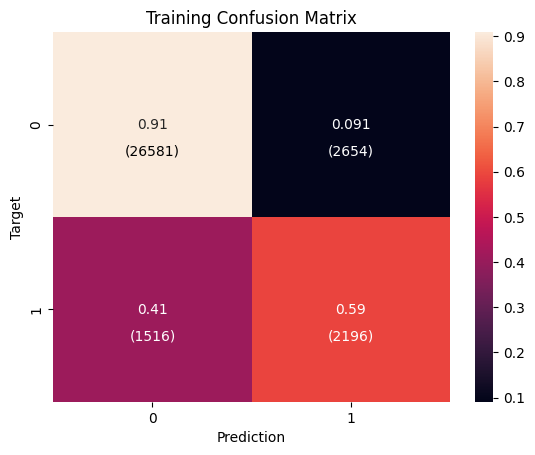

Precision score: 0.47
Recall score: 0.62
F1 score: 0.53


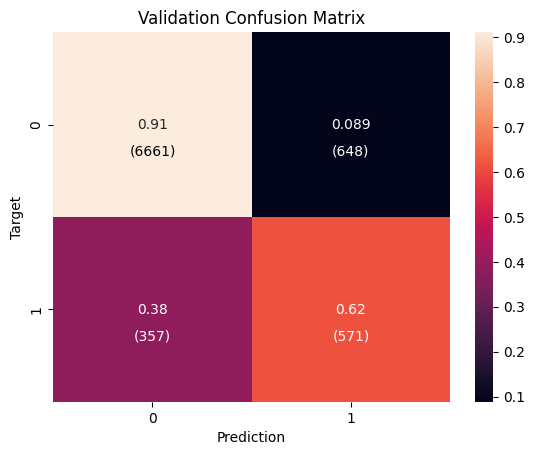

In [76]:
threshold = get_best_threshold(xgb, val_X, val_y)
print("Best threshold: {:.2f}".format(threshold))
compute_metrics(xgb, train_X, train_y, 'Training', threshold)
compute_metrics(xgb, val_X, val_y, 'Validation', threshold)

### Parameter tuning with Randomized Search

In [60]:
# Define the parameter grid for random search
params_xgb = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 10, 100]
}

# Set up the RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=params_xgb,
    scoring="f1",
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(train_X, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300],
                                        'reg_alpha': [0, 0.1, 1, 10],
                                        'reg_lambda': [1, 10, 100],
                                        'subsample': [0.5, 0.6, 0.7]},
                   random_state=42, scoring='f1', verbose=2)

In [61]:
random_search_xgb.best_params_, random_search_xgb.best_score_

({'subsample': 0.6,
  'reg_lambda': 1,
  'reg_alpha': 0,
  'n_estimators': 300,
  'min_child_weight': 5,
  'max_depth': 5,
  'learning_rate': 0.1,
  'gamma': 0,
  'colsample_bytree': 0.5},
 0.3688711406979688)

In [62]:
xgb_random_search_best = random_search_xgb.best_estimator_
xgb_random_search_best.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Best threshold: 0.20
Precision score: 0.49
Recall score: 0.61
F1 score: 0.54


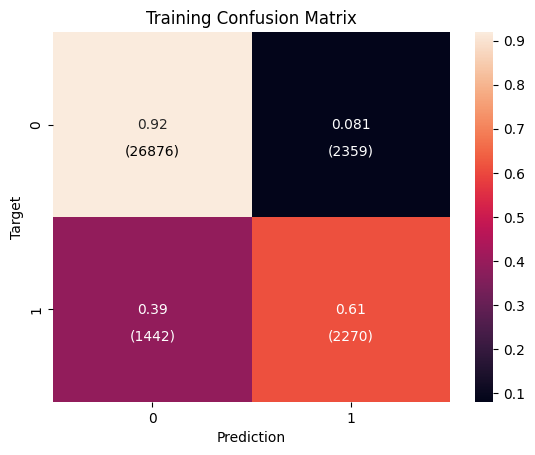

Precision score: 0.47
Recall score: 0.60
F1 score: 0.53


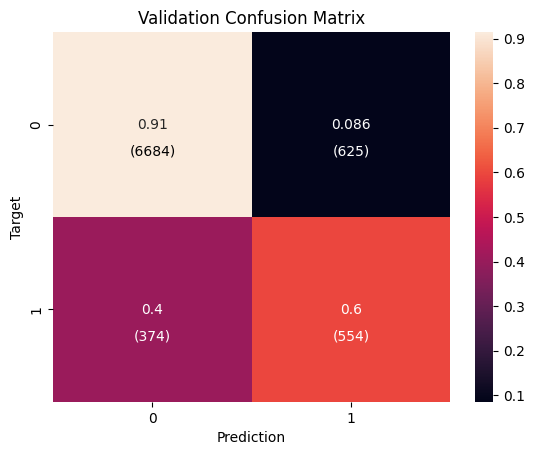

In [63]:
threshold = get_best_threshold(xgb_random_search_best, val_X, val_y)
print("Best threshold: {:.2f}".format(threshold))
compute_metrics(xgb_random_search_best, train_X, train_y, 'Training', threshold)
compute_metrics(xgb_random_search_best, val_X, val_y, 'Validation', threshold)

# Model Comparison


| Model Name              | Train Score | Validation Score | Hyperparameters                                                                                                                                                                                                                                                                                                                                                                   |
|-------------------------|-------------|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LogisticRegression       | 0.47        | 0.49             | solver='sag'                                                                                                                                                                                                                                                                                                                                                                     |
| KNeighborsClassifier     | 0.5         | 0.5              | n_neighbors=23                                                                                                                                                                                                                                                                                                                                                                   |
| DecisionTreeClassifier   | 0.5         | 0.52             | {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 23, 'max_features': None, 'max_depth': 19, 'criterion': 'entropy'}                                                                                                                                                                                             |
| XGBClassifier            | 0.51        | 0.53             | {'colsample_bytree': 0.5758378511896678, 'gamma': 0.2994510146185895, 'learning_rate': 0.04895259491358088, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 200, 'reg_alpha': 1.2278584960381755, 'reg_lambda': 5.062449643455724, 'subsample': 0.4680562942755506}                                                                                                         |
| XGBClassifier            | 0.54        | 0.53             | {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}                                                                                                                                                                                                         |


Models perform relatively poorly with Logistic Regression being the weakest and XGB Classifier (with hyperparameter tuning using RandomizedSearchCV) being the best.
The dataset is heavily skewed towards the negative class, so in further experiments I would explore oversampling or undersampling to fight the class imbalance.

# Feature Importance

Let's train the XGB Classifier which showed the best results on the full dataset and find the most important features for the classifier using permutation importance.

Permutation feature importance is a model inspection technique that measures the contribution of each feature to the model’s statistical performance. By breaking the relationship between the feature and the target, we determine how much the model relies on such particular feature.

In [77]:
# Combine train and validation sets
full_X = pd.concat([train_X, val_X])
full_y = pd.concat([train_y, val_y])

# Fit and predict on the full dataset
xgb_random_search_best.fit(full_X, full_y)
preds_probas = xgb_random_search_best.predict_proba(full_X)[:,1]
threshold = get_best_threshold(xgb_random_search_best, full_X, full_y)
preds = (preds_probas >= threshold).astype(int)

# Create a dataframe with target and predictions
df_predictions = full_X.copy()
df_predictions['y'] = full_y
df_predictions['prediction'] = preds

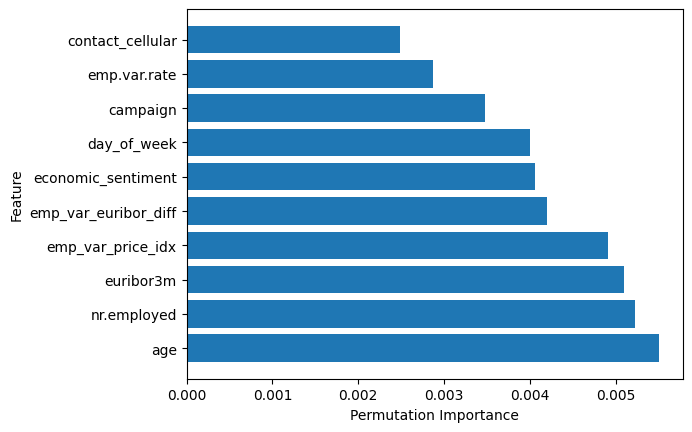

In [80]:
# Find top 10 most important features
perm_importance = permutation_importance(xgb_random_search_best, full_X, full_y)
sorted_idx_top10 = np.flip(perm_importance.importances_mean.argsort()[-10:])
important_features = full_X.columns[sorted_idx_top10]
plt.barh(important_features, perm_importance.importances_mean[sorted_idx_top10])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.show()

This analysis show again that client characteristics are less important compared to external economic factors which suggest these features are weak or inefficient.

# Incorrect Predictions Analysis

In [81]:
# Separate into groups for further analysis
df_false_positives = df_predictions[(df_predictions.y != df_predictions.prediction) & (df_predictions.prediction == 1)]
df_false_negatives = df_predictions[(df_predictions.y != df_predictions.prediction) & (df_predictions.prediction == 0)]
df_true_positives = df_predictions[(df_predictions.y == df_predictions.prediction) & (df_predictions.prediction == 1)]
df_true_negatives = df_predictions[(df_predictions.y == df_predictions.prediction) & (df_predictions.prediction == 0)]

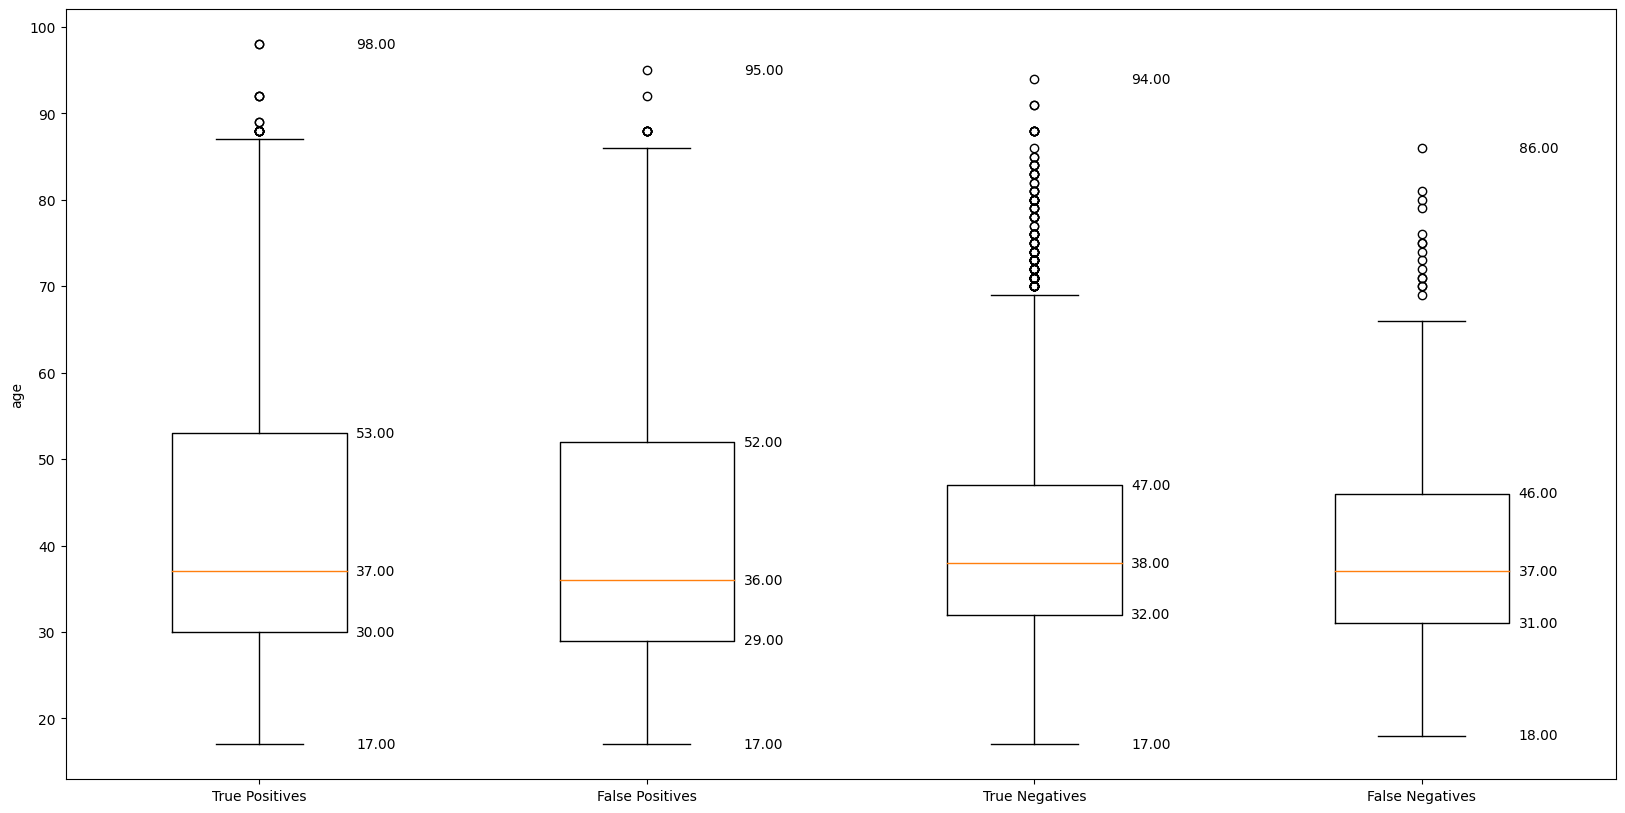

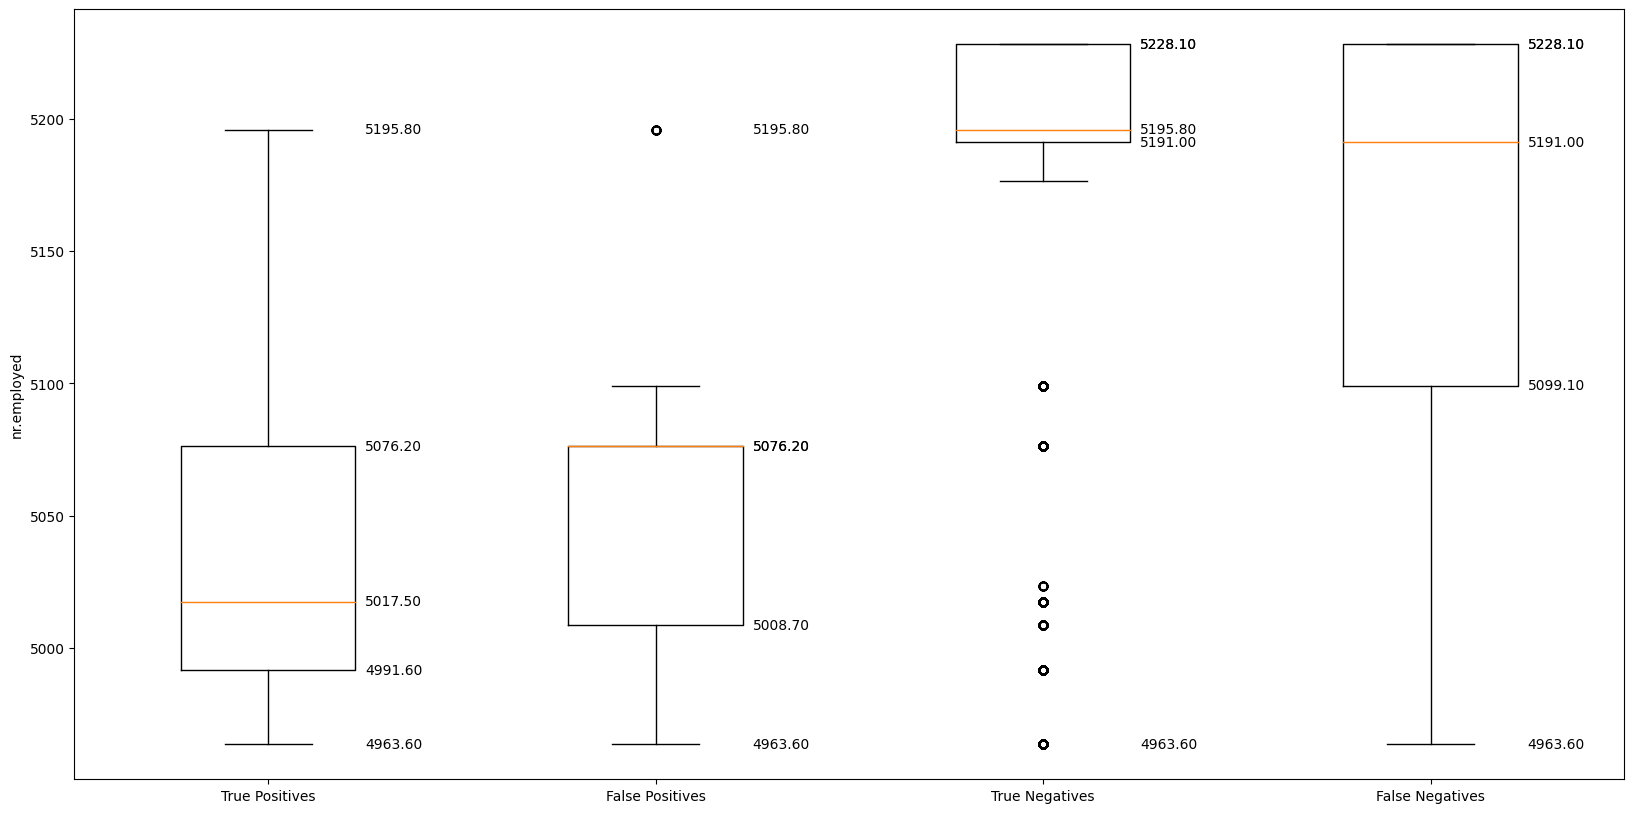

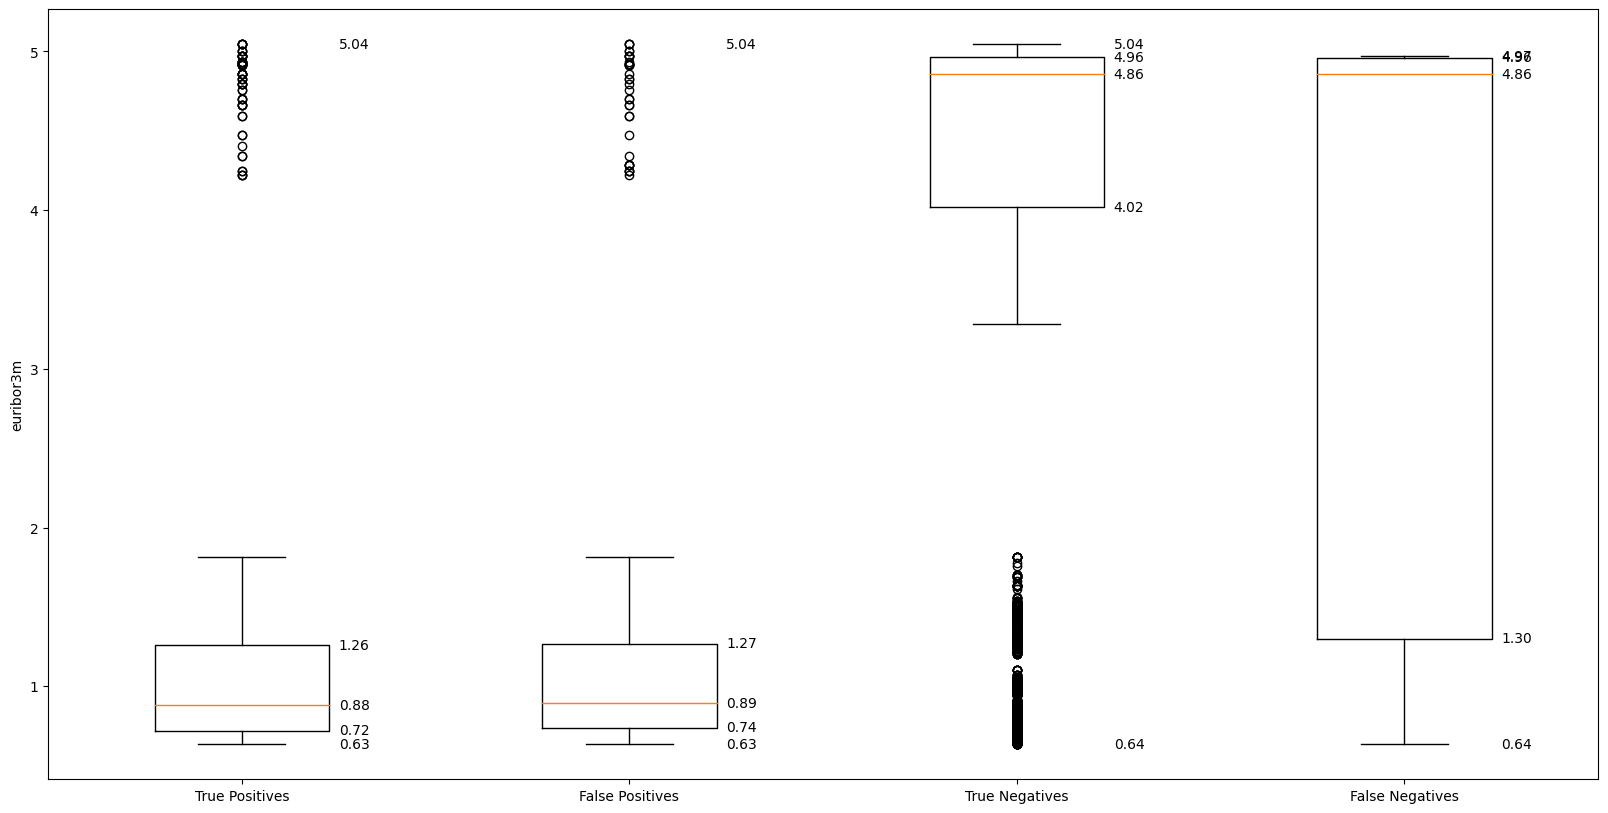

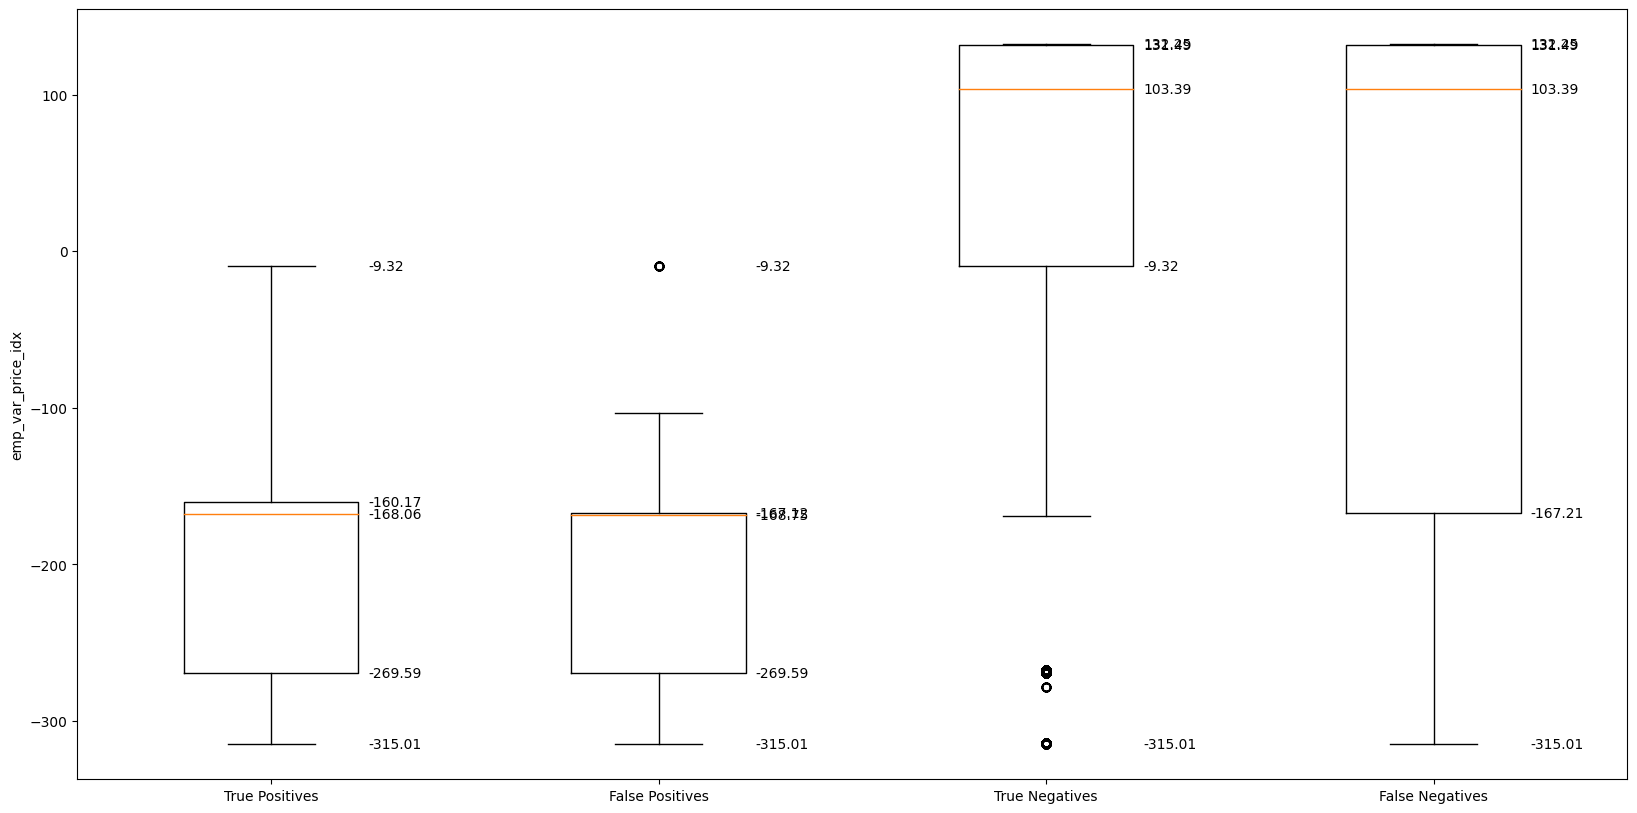

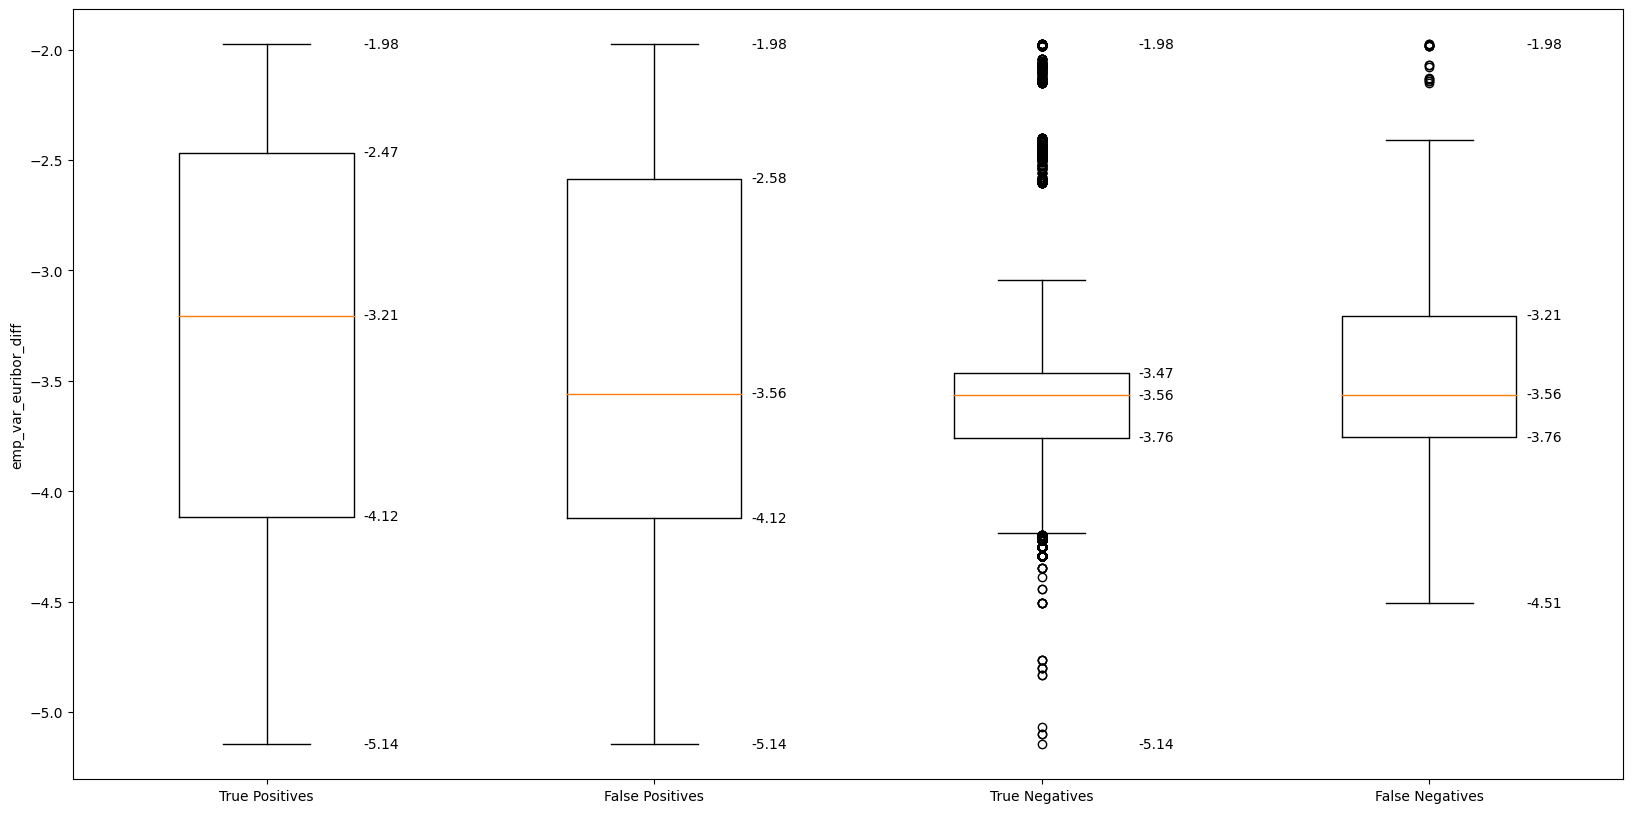

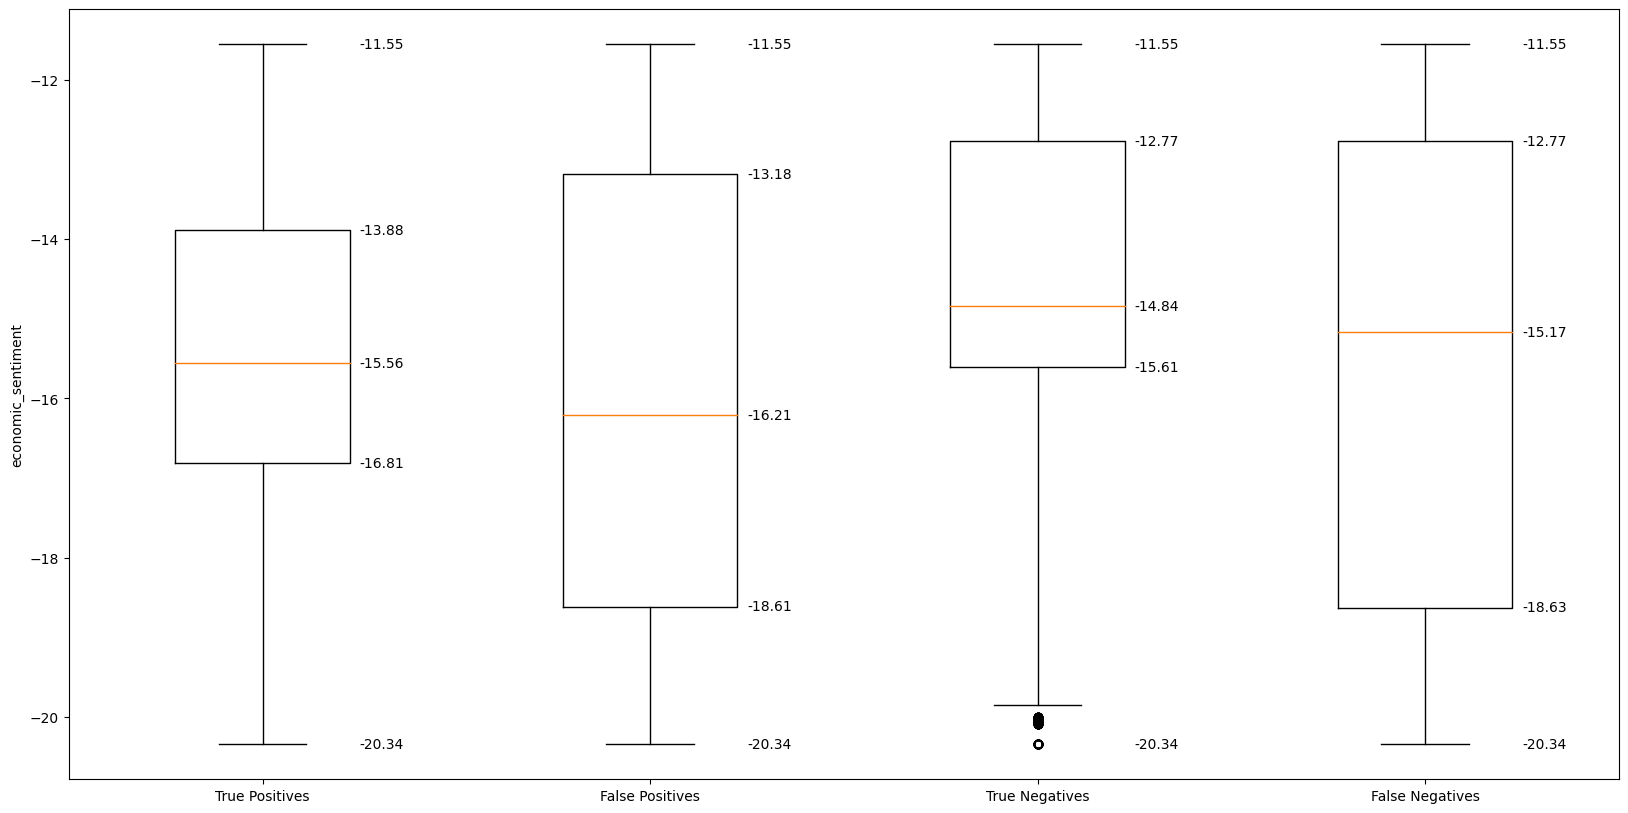

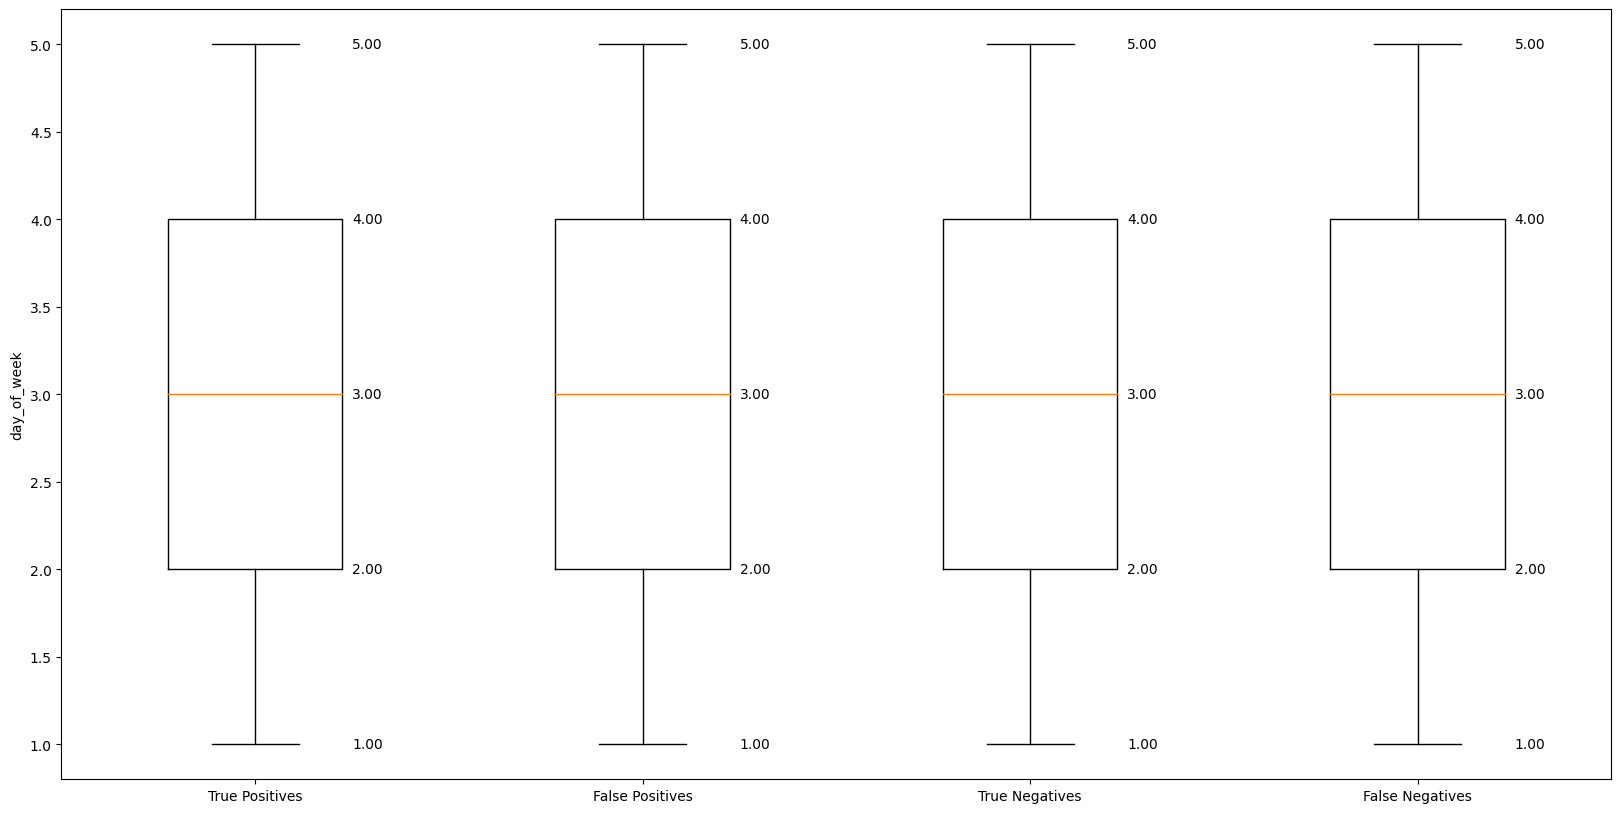

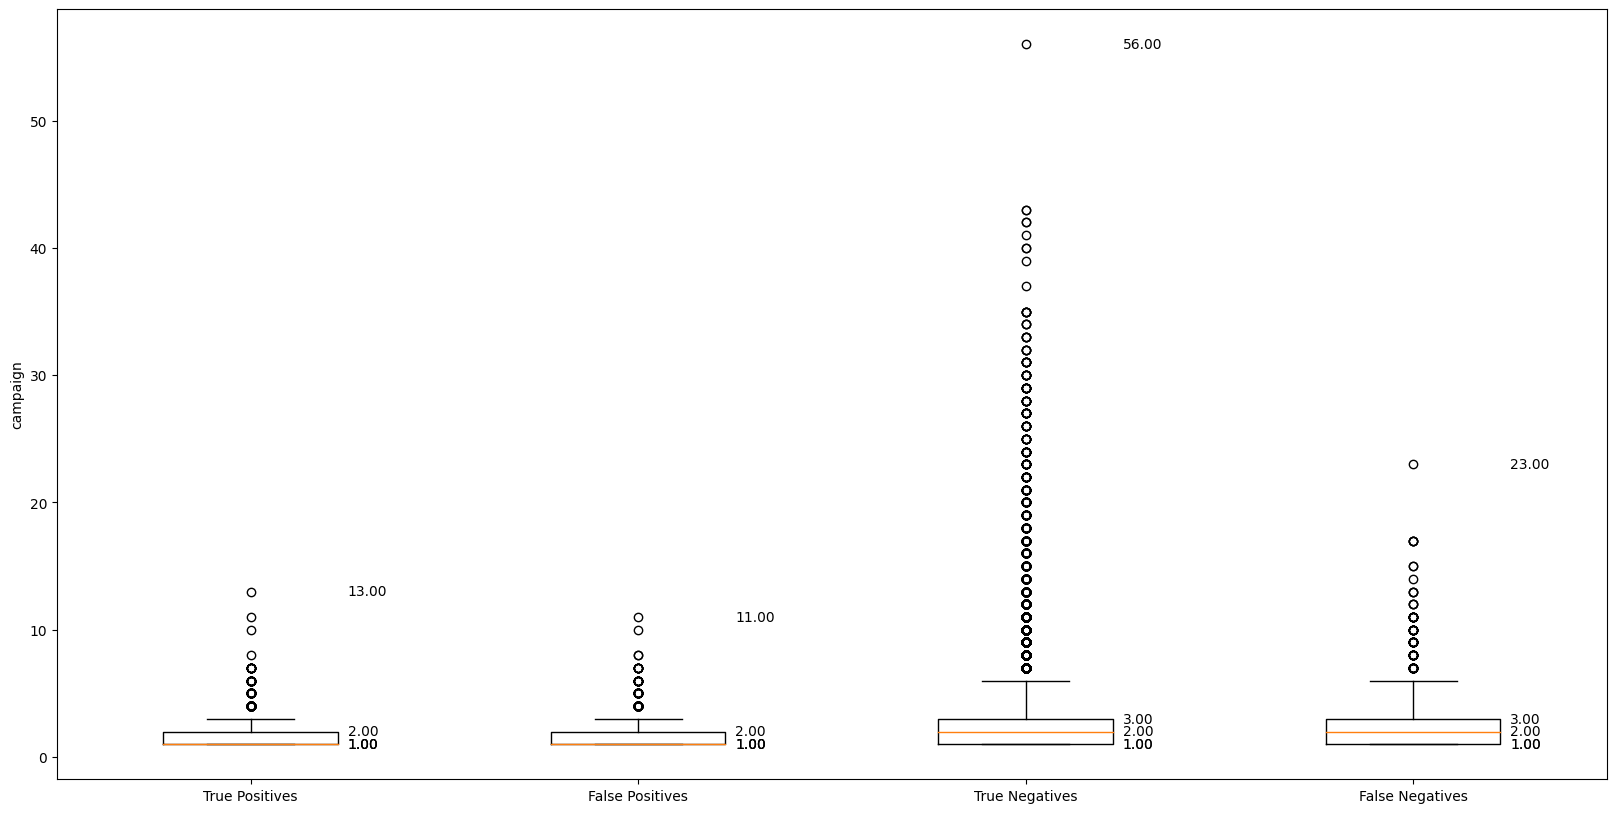

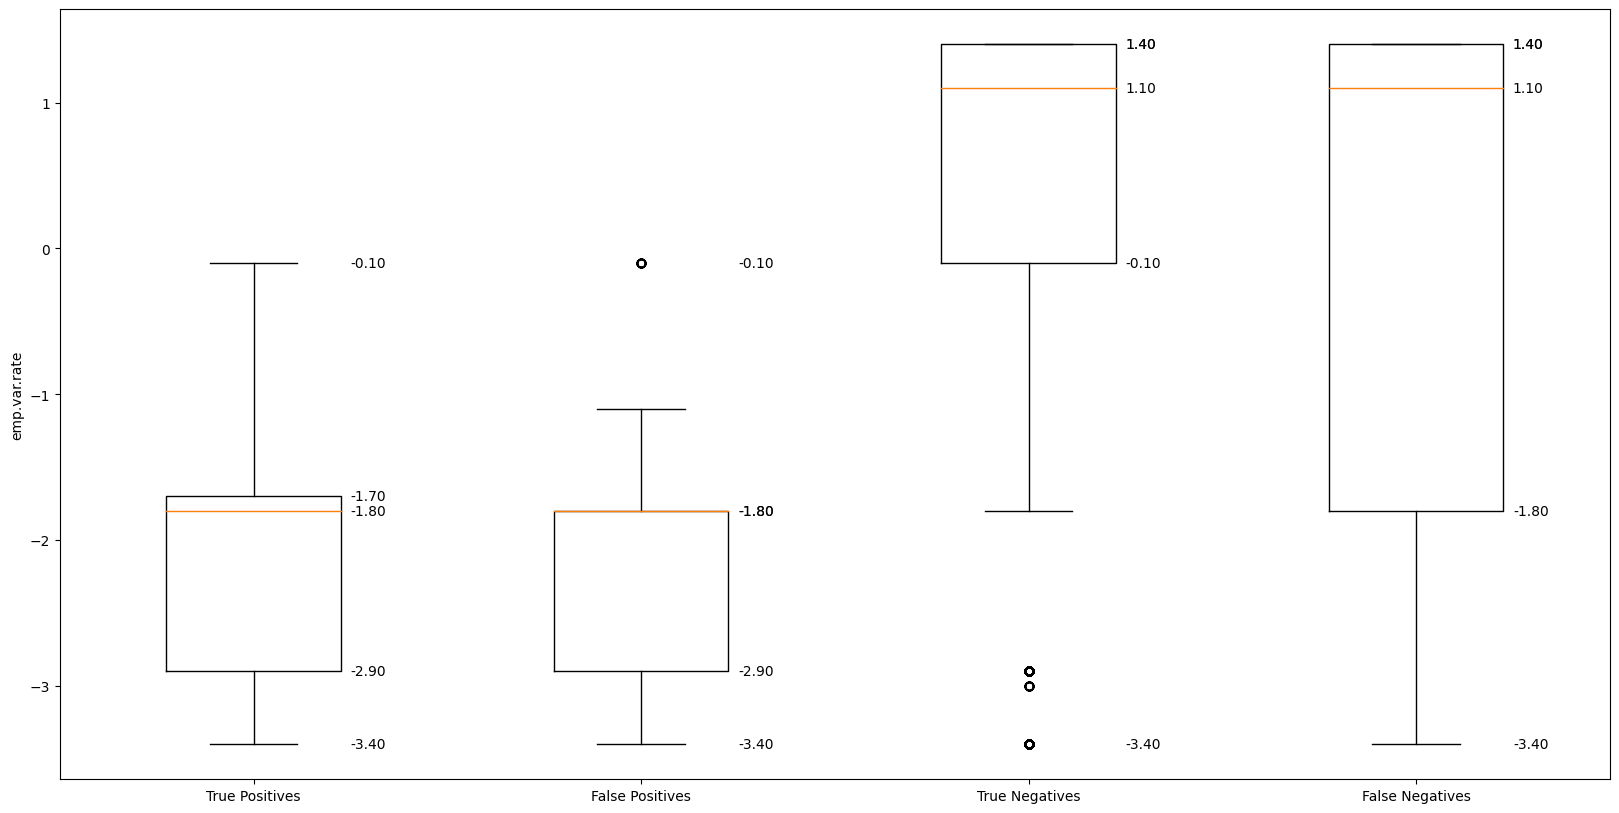

In [85]:
def build_boxplots(feature):
  data = [df_true_positives[feature], df_false_positives[feature], df_true_negatives[feature], df_false_negatives[feature]]
  # Calculate quartiles
  quartiles = [np.percentile(group, [0, 25, 50, 75, 100]) for group in data]

  # Plot the boxplot
  plt.figure(figsize=(20, 10))
  plt.boxplot(data)

  # Add text
  for i, q in enumerate(quartiles):
      plt.text(i + 1.25, quartiles[i][0], f'{quartiles[i][0]:.2f}', va='center')  # 0th percentile
      plt.text(i + 1.25, quartiles[i][1], f'{quartiles[i][1]:.2f}', va='center')  # 25th percentile
      plt.text(i + 1.25, quartiles[i][2], f'{quartiles[i][2]:.2f}', va='center')  # 50th percentile
      plt.text(i + 1.25, quartiles[i][3], f'{quartiles[i][3]:.2f}', va='center')  # 75th percentile
      plt.text(i + 1.25, quartiles[i][4], f'{quartiles[i][4]:.2f}', va='center')  # 100th percentile

  plt.xticks([1, 2, 3, 4], ['True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
  plt.ylabel(feature)

for feature in important_features[:9]:
  build_boxplots(feature)

**Age:**

The median age across all four groups is similar.
True and False Positives have a wider spread of ages, with more older individuals, as evidenced by the larger number of outliers.
True and False Negatives show a narrower distribution, with fewer outliers and generally younger individuals. Positive outcomes (both True and False) tend to have more older outliers, indicating that older individuals are more likely to be classified as positive, whether correctly or incorrectly.

**nr.employed:**

The False Negatives group has a significantly higher median "nr.employed" compared to the other groups.
The True Positives and False Positives have similar IQRs, while the True Negatives have an extremely narrow IQR with little variation in employment levels. The False Negatives group shows the largest spread in employment levels, indicating greater variability.  
This suggests that negatives (true and false) are linked to higher employment levels.

**euribor3m:**

True and False Positives are associated with lower Euribor rates (median around 0.88–0.89).
True and False Negatives are linked to significantly higher Euribor rates (median around 4.86), though False Negatives have a wider range.
There are outliers in the True Negatives category, where the Euribor rate drops below 4.0 for some instances, but no outliers are visible for False Negatives.
This suggests that higher Euribor rates are more likely to be associated with negative outcomes (True and False Negatives), while lower Euribor rates are associated with positive outcomes (True and False Positives). However, in some cases (False Negatives), the Euribor rate can be lower as well.

**emp.var.rate:**

Similarly to Euribor rate, True and False Positives are associated with lower employment variation rate with a median -1.8, while True and False Negatives are linked to significantly higher employment variation rate rates with median around 1.1, though False Negatives have a wider range.


**Key Insights:**

True Positives and False Positives exhibit similar distributions across most features.

In my opinion, this is because the current features do not provide sufficient predictive power, thus the model struggles to differentiate between the two classes effectively.

I think, data mining to gather more data that would provide additional insights into customer behavior could help address this problem. Some ideas are:

Customer interactions: The total number of interactions (calls, chats, visits) with the bank over time.

Product usage: Information about other products the customer is using (savings accounts, mortgages, credit cards).

Transaction data: Monthly spending habits might indicate the customer’s financial activity.

Website/App Engagement: Frequency of login to online banking, checking accounts, and using bank apps could help determine customer engagement.